# Visualizing Honey Production 🍯 🐝

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
honey = pd.read_csv('../honey.csv')
honey.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


Use a scatterplot to show the relationship between a state and its price per pound for local honey

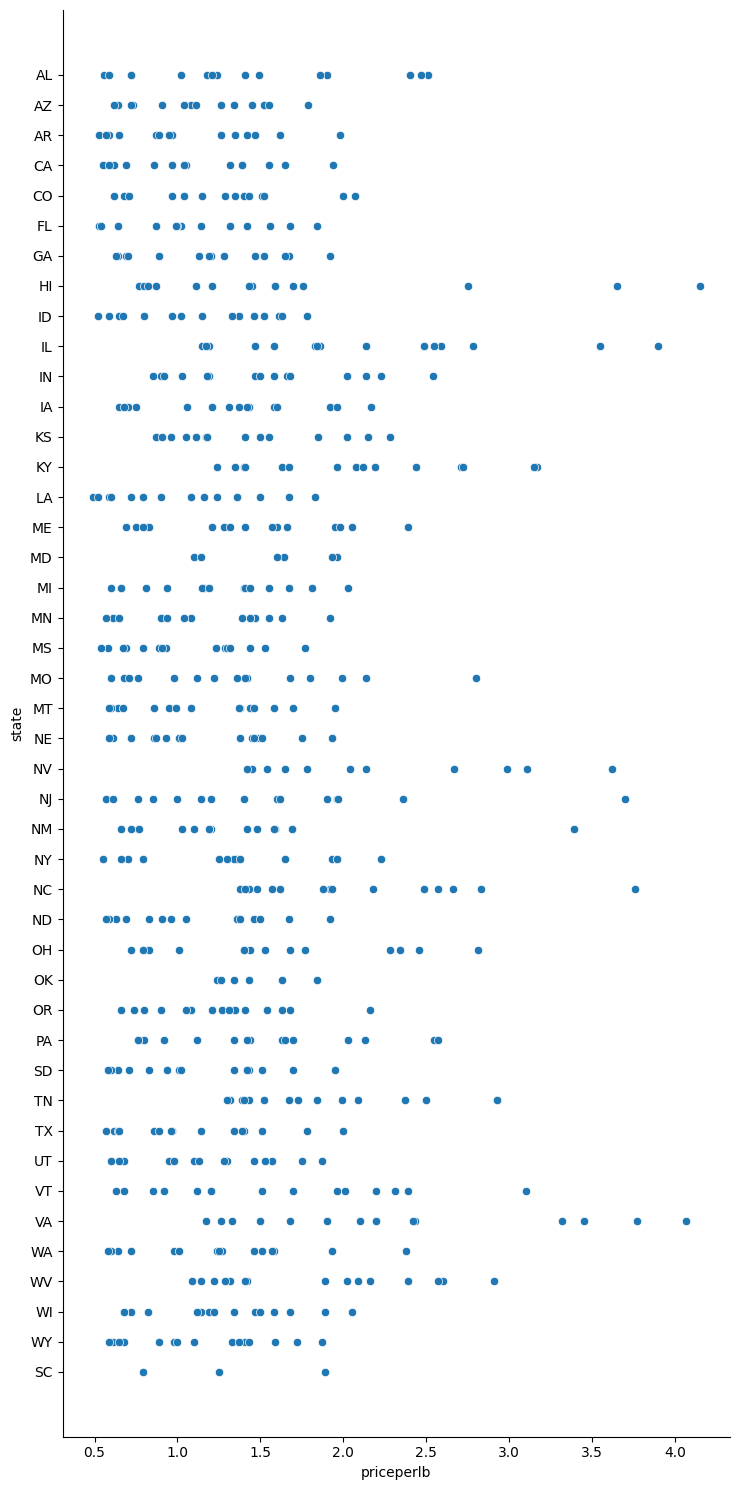

In [18]:
sns.relplot(x="priceperlb", y="state", data=honey, height=15, aspect=.5);


Show this relationship plus a new yellow-colored scatterplot with hue determined by year.

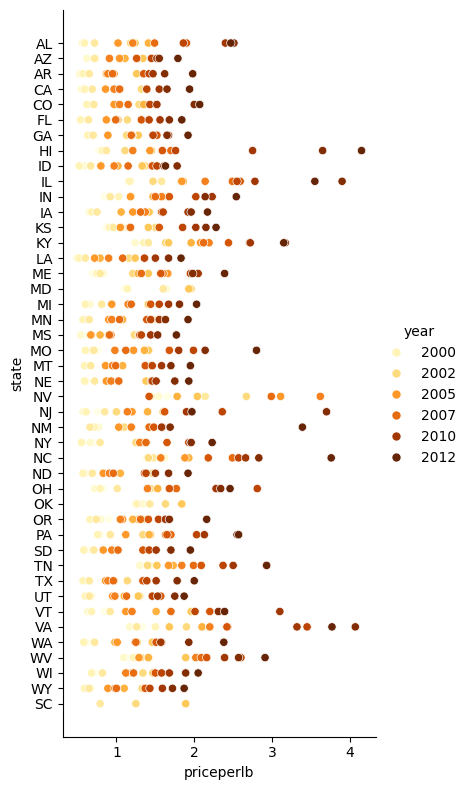

In [23]:
sns.relplot(x="priceperlb", y="state", hue="year", palette="YlOrBr", data=honey, height=8, aspect=.5);


show with another color

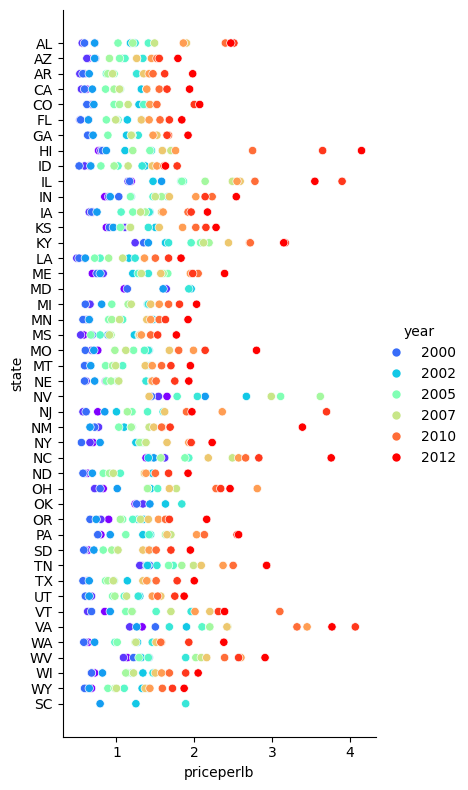

In [24]:
sns.relplot(x="priceperlb", y="state", hue="year", palette="rainbow", data=honey, height=8, aspect=.5);

With this color scheme change, you can see that there's obviously a strong progression over the years in terms of honey price per pound. Indeed, if you look at a sample set in the data to verify (pick a given state, Arizona for example) you can see a pattern of price increases year over year, with few exceptions:

In [20]:
honey[honey['state']== 'AZ']

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
44,AZ,52000.0,62,3224000.0,1548000.0,0.62,1999000.0,1999
87,AZ,40000.0,59,2360000.0,1322000.0,0.73,1723000.0,2000
130,AZ,43000.0,59,2537000.0,1142000.0,0.72,1827000.0,2001
174,AZ,38000.0,63,2394000.0,1197000.0,1.08,2586000.0,2002
218,AZ,35000.0,72,2520000.0,983000.0,1.34,3377000.0,2003
262,AZ,32000.0,55,1760000.0,774000.0,1.11,1954000.0,2004
303,AZ,36000.0,50,1800000.0,720000.0,1.04,1872000.0,2005
344,AZ,30000.0,65,1950000.0,839000.0,0.91,1775000.0,2006
385,AZ,30000.0,64,1920000.0,902000.0,1.26,2419000.0,2007


Try this plot one more time, this time showing the price change by size of the dot in the scatterplot

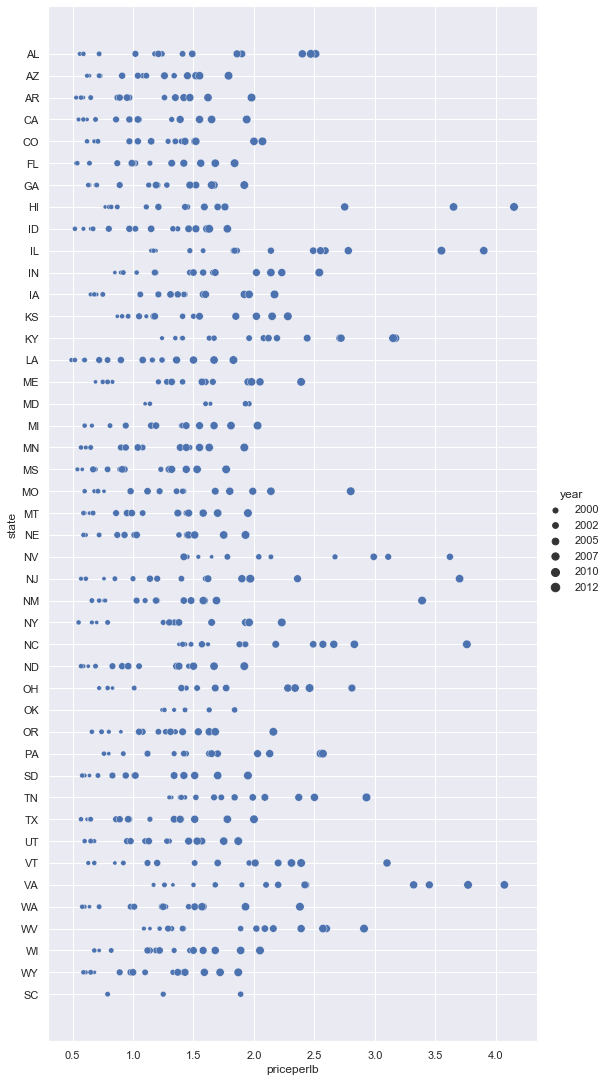

In [180]:
sns.relplot(x="priceperlb", y="state", size="year", data=honey, height=15, aspect=.5);


show with different style

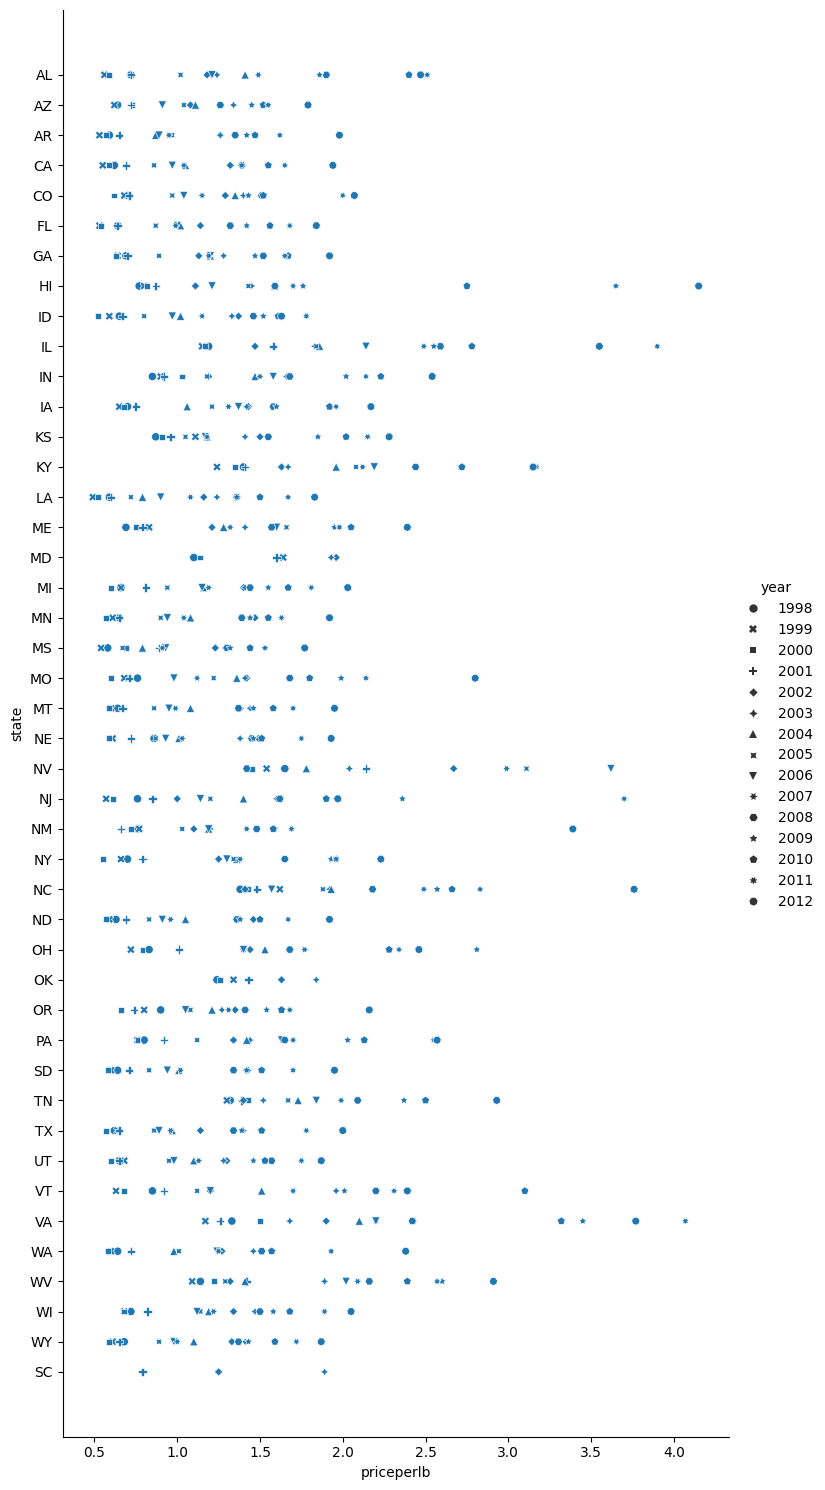

In [25]:
sns.relplot(x="priceperlb", y="state", style="year", data=honey, height=15, aspect=.5);


Is this a simple case of supply and demand? Due to factors such as climate change and colony collapse, is there less honey available for purchase year over year, and thus the price increases?

To discover a correlation between some of the variables in this dataset, let's explore some line charts.

Explore some line charting options

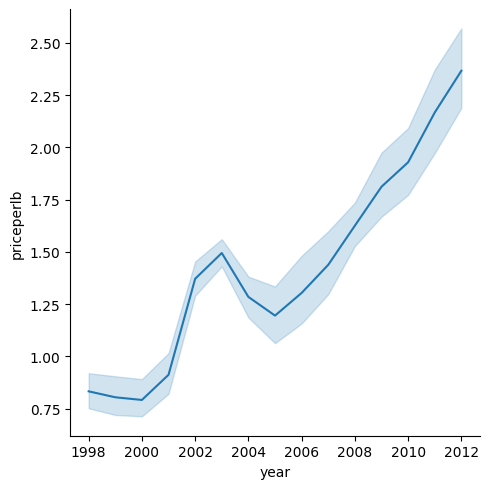

In [27]:
sns.relplot(x="year", y="priceperlb", kind="line", data=honey);

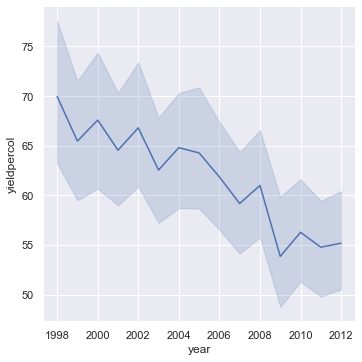

In [201]:
sns.relplot(x="year", y="totalprod", kind="line", data=honey);

Build a facet grid

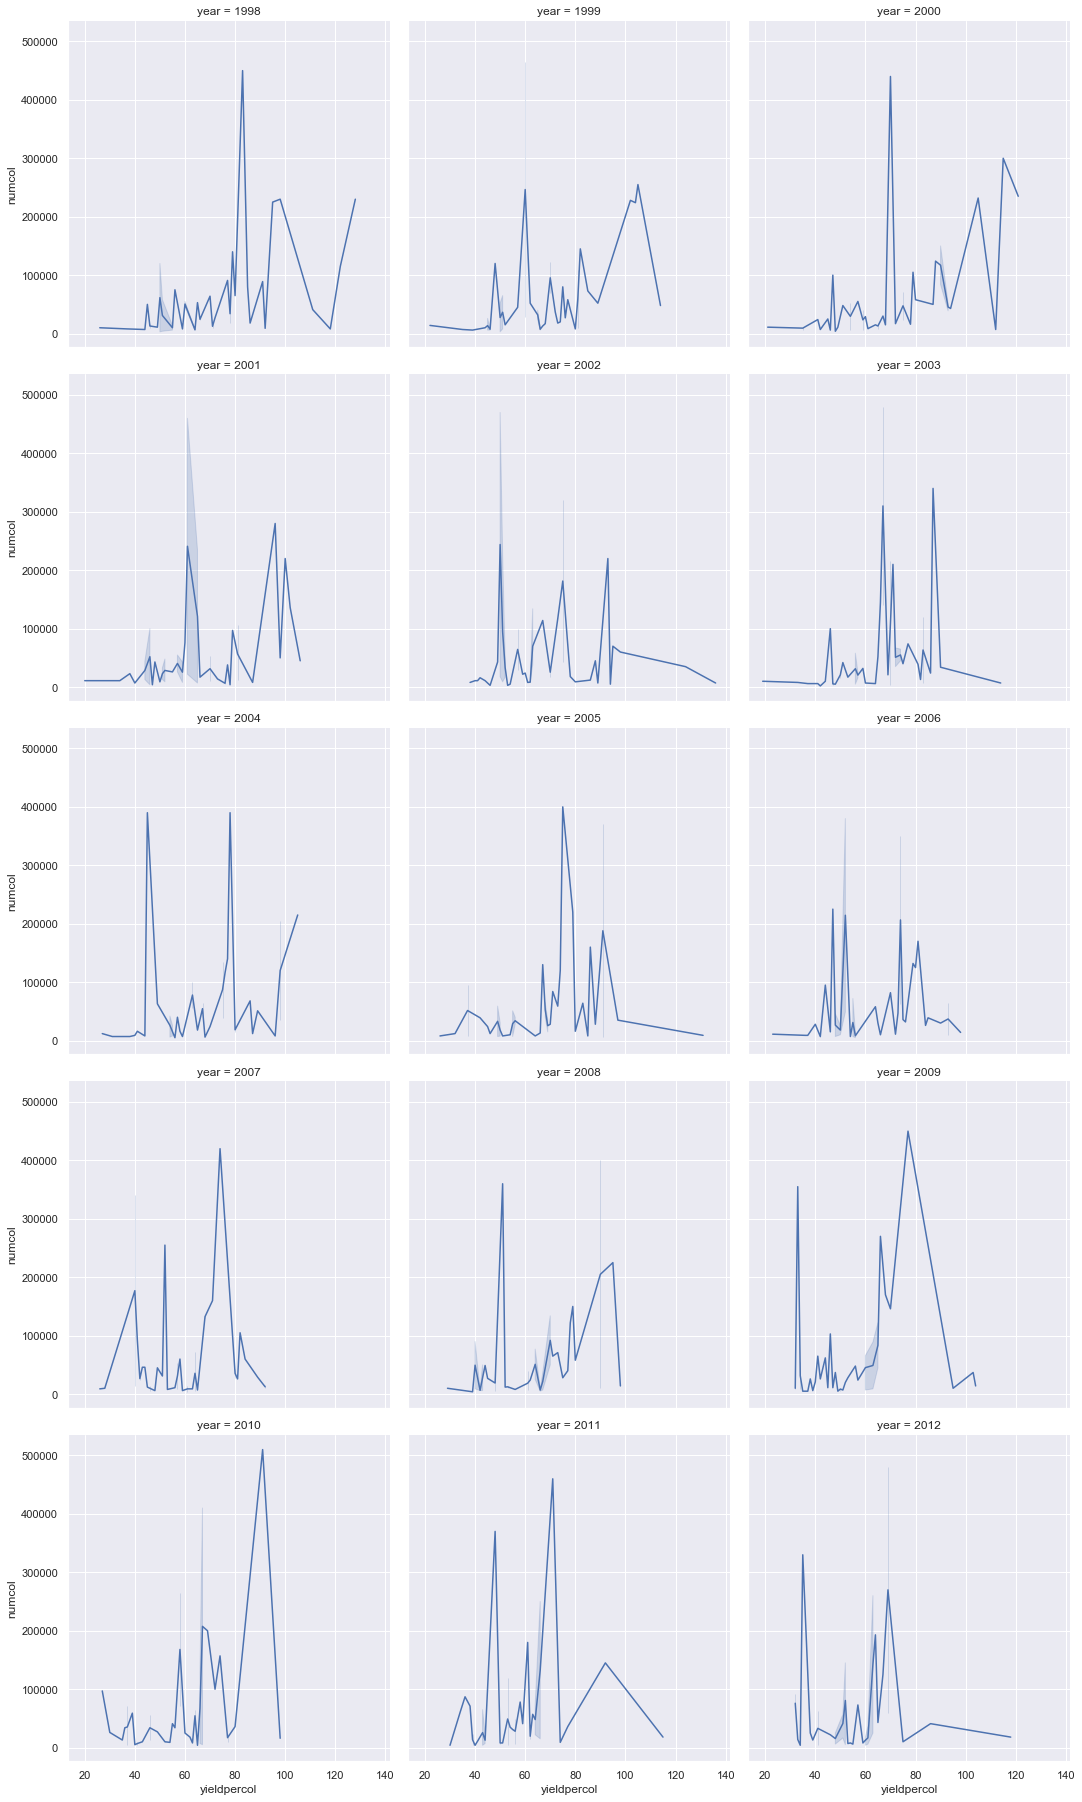

In [189]:

sns.relplot(
    data=honey, 
    x="yieldpercol", y="numcol",
    col="year", 
    col_wrap=3,
    kind="line"
)


Create a dual line plot (this solution is suggested by Kedar Ghule: https://kedar.hashnode.dev/how-to-combine-two-line-charts-in-seaborn-and-python)

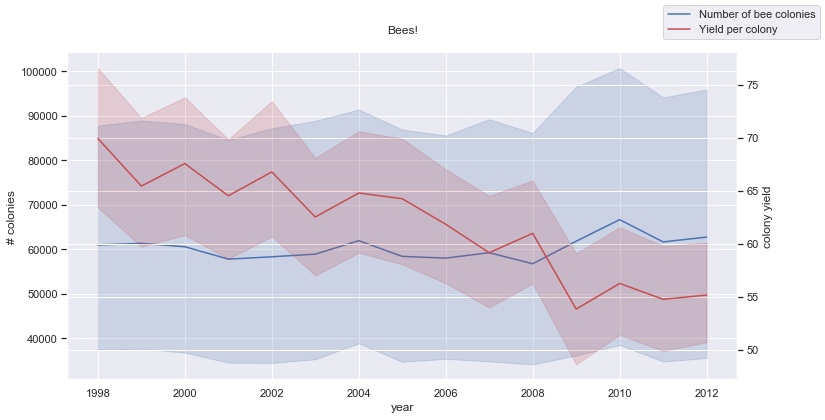

In [200]:
fig, ax = plt.subplots(figsize=(12,6))
lineplot = sns.lineplot(x=honey['year'], y=honey['numcol'], data=honey, 
                        label = 'Number of bee colonies', legend=False)
sns.despine()
plt.ylabel('# colonies')
plt.title('Honey Production Year over Year');

ax2 = ax.twinx()
lineplot2 = sns.lineplot(x=honey['year'], y=honey['yieldpercol'], ax=ax2, color="r", 
                         label ='Yield per colony', legend=False) 
sns.despine(right=False)
plt.ylabel('colony yield')
ax.figure.legend();